<a href="https://colab.research.google.com/github/shemjabasteen-M/shem-jabasteen/blob/master/Fuel_Consumption_Prediction_%26_Route_Optimization_for_Maritime_Vessel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('ship_fuel_efficiency.csv')
df.head(5)

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving ship_fuel_efficiency.csv to ship_fuel_efficiency.csv
User uploaded file "ship_fuel_efficiency.csv" with length 122250 bytes


In [ ]:
df.columns

Index(['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type',
       'fuel_consumption', 'CO2_emissions', 'weather_conditions',
       'engine_efficiency'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


In [ ]:
df.shape

(1440, 10)

In [ ]:
## checking the numeric column

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['distance', 'fuel_consumption', 'CO2_emissions', 'engine_efficiency']


In [ ]:
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['ship_id', 'ship_type', 'route_id', 'month', 'fuel_type', 'weather_conditions']


In [ ]:
## checking the null values

df.isnull().sum()

,0
ship_id,0
ship_type,0
route_id,0
month,0
distance,0
fuel_type,0
fuel_consumption,0
CO2_emissions,0
weather_conditions,0
engine_efficiency,0


In [20]:
df[numeric_cols].describe()

,distance,fuel_consumption,CO2_emissions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,151.753354,4844.246535,13365.454882,82.582924
std,108.472230,4892.352813,13567.650118,7.158289
min,20.080000,237.880000,615.680000,70.010000
25%,79.002500,1837.962500,4991.485000,76.255000
50%,123.465000,3060.880000,8423.255000,82.775000
75%,180.780000,4870.675000,13447.120000,88.862500
max,498.550000,24648.520000,71871.210000,94.980000


In [22]:
df[categorical_cols].value_counts(normalize=True)

ship_id  ship_type         route_id             month      fuel_type  weather_conditions
NG119    Tanker Ship       Port Harcourt-Lagos  November   HFO        Calm                  0.000694
                                                February   Diesel     Stormy                0.000694
                           Lagos-Apapa          June       HFO        Calm                  0.000694
                                                April      Diesel     Stormy                0.000694
                           Escravos-Lagos       October    HFO        Moderate              0.000694
                                                                                              ...   
NG001    Oil Service Boat  Port Harcourt-Lagos  April      Diesel     Stormy                0.000694
                           Lagos-Apapa          October    HFO        Moderate              0.000694
                                                May        HFO        Calm                  0.000694
                           Escravos-Lagos       September  Diesel     Calm                  0.000694
                                                December   HFO        Calm                  0.000694
Name: proportion, Length: 1440, dtype: float64

In [24]:
df['ship_id'].value_counts()

,count
ship_id,
NG001,12
NG002,12
NG003,12
NG004,12
NG005,12
...,...
NG116,12
NG117,12
NG118,12


In [25]:
df['ship_type'].value_counts()

,count
ship_type,
Oil Service Boat,408
Tanker Ship,408
Surfer Boat,324
Fishing Trawler,300


In [26]:
df['fuel_type'].value_counts()

,count
fuel_type,
Diesel,899
HFO,541


In [27]:
df['weather_conditions'].value_counts()

,count
weather_conditions,
Calm,516
Stormy,462
Moderate,462


In [29]:
df['month'].value_counts()

,count
month,
January,120
February,120
March,120
April,120
May,120
June,120
July,120
August,120
September,120


In [30]:
df['route_id'].value_counts()

,count
route_id,
Port Harcourt-Lagos,389
Lagos-Apapa,388
Escravos-Lagos,369
Warri-Bonny,294


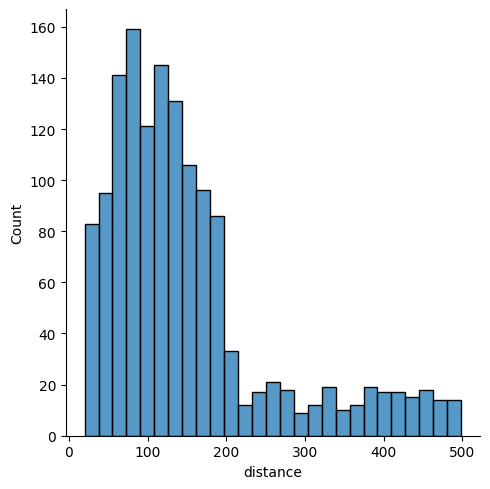

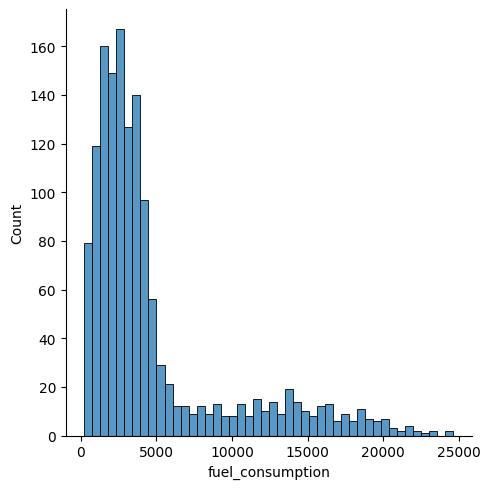

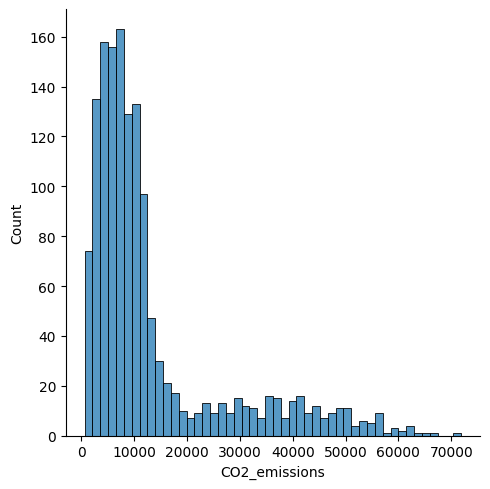

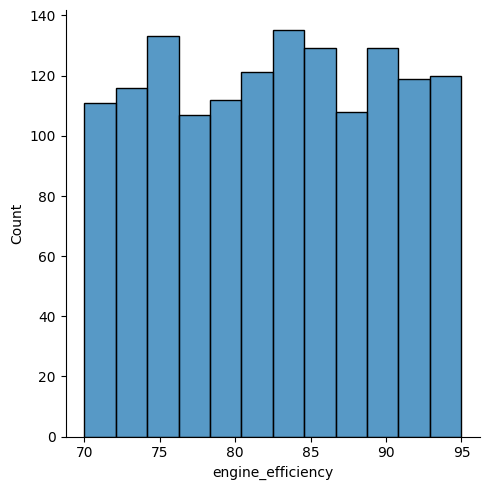

In [32]:
## Data Visualization
#numeric - distplot
for i in numeric_cols:
    sns.displot(df[i])
    plt.show

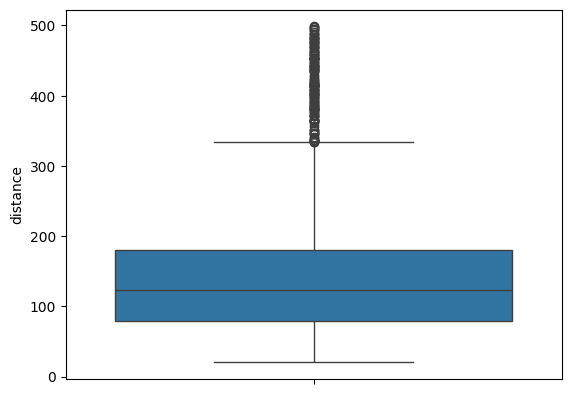

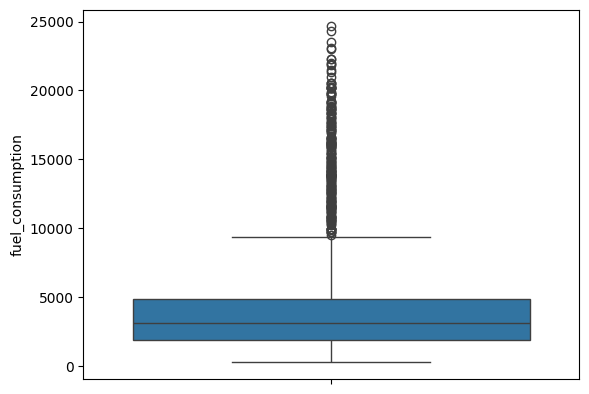

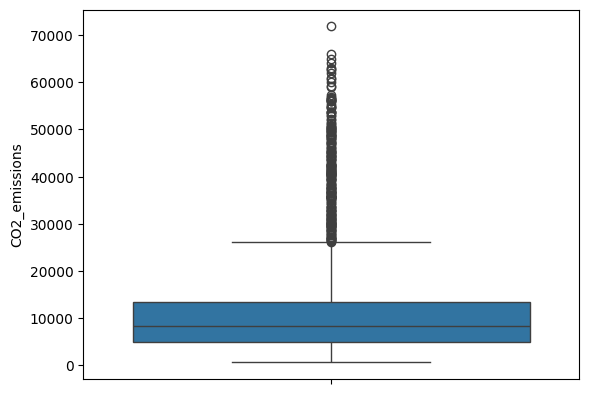

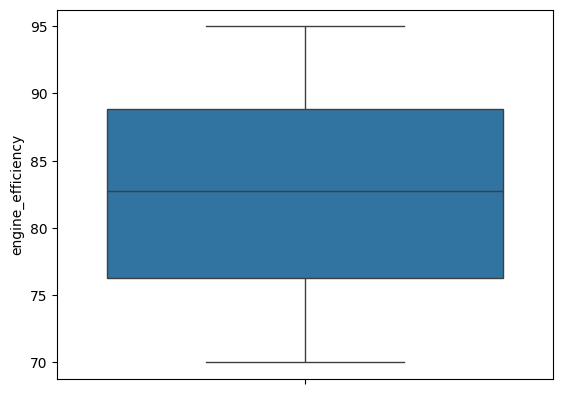

In [33]:
## #numeric - boxplot
for i in numeric_cols:
    sns.boxplot(df[i])
    plt.show()

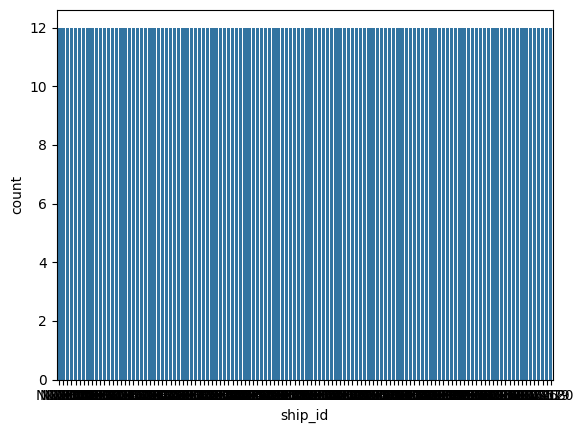

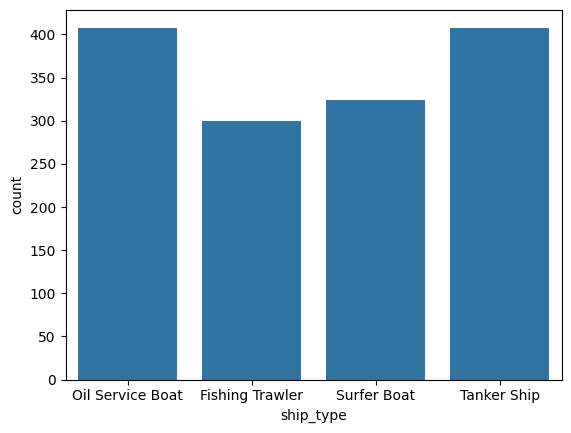

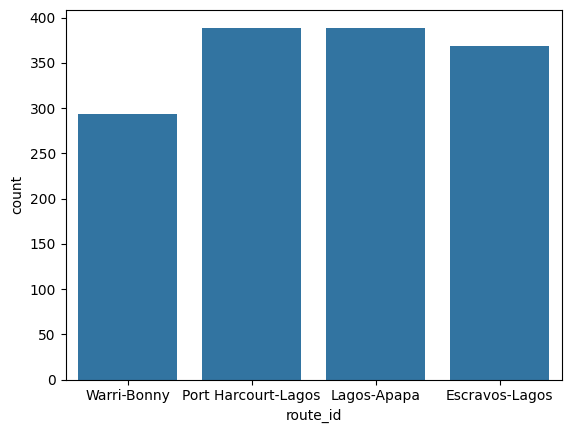

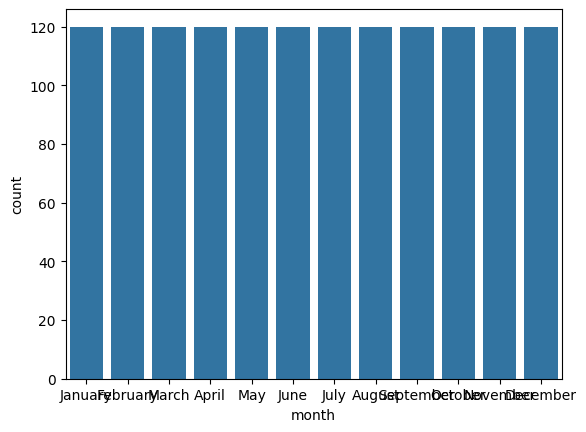

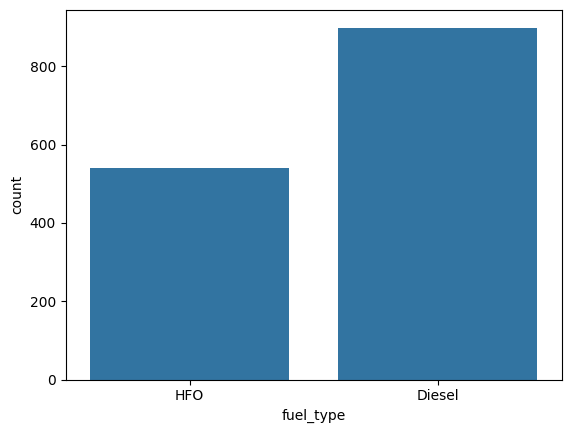

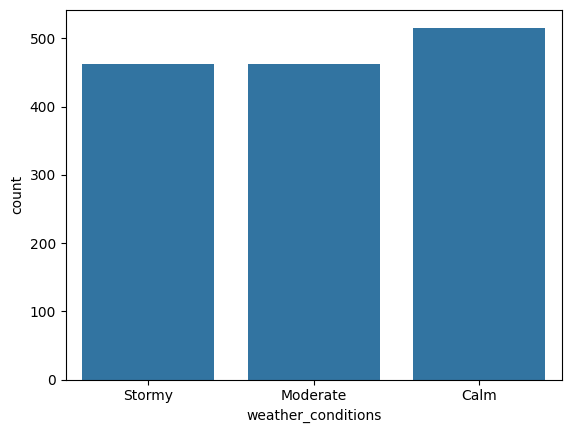

In [34]:
#categorical - countplot
for i in categorical_cols:
    sns.countplot(x=df[i])
    plt.show()

In [36]:
df[numeric_cols].corr()


,distance,fuel_consumption,CO2_emissions,engine_efficiency
distance,1.000000,0.945100,0.942657,-0.026146
fuel_consumption,0.945100,1.000000,0.997247,-0.031269
CO2_emissions,0.942657,0.997247,1.000000,-0.030151
engine_efficiency,-0.026146,-0.031269,-0.030151,1.000000


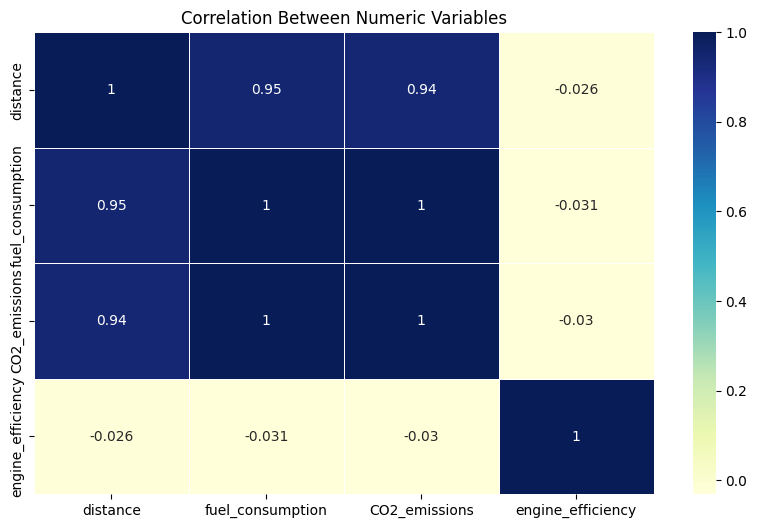

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Between Numeric Variables')
plt.show()


In [38]:
df.columns

Index(['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type',
       'fuel_consumption', 'CO2_emissions', 'weather_conditions',
       'engine_efficiency'],
      dtype='object')

In [40]:
## Feature Engineering
df['fuel_per_km'] = df['fuel_consumption'] / df['distance']
df['co2_per_km'] = df['CO2_emissions'] / df['distance']


In [41]:
df['fuel_per_km'].head(3)

,fuel_per_km
0,28.578331
1,34.713974
2,27.752303


In [42]:
df['co2_per_km'].head(3)

,co2_per_km
0,80.339936
1,99.437675
2,79.539525


In [55]:
df['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [56]:
def season(month):
  if month in ['December','January','February']:
    return 'Winter'
  elif month in ['March','April','May']:
    return 'Spring'
  elif month in ['June','July','August']:
    return 'Summer'
  elif month in ['September','October','November']:
    return 'Autumn'

In [57]:
df['season_name'] = df['month'].apply(season)

In [58]:
df['season_name'].head(5)

,season_name
0,Winter
1,Winter
2,Spring
3,Spring
4,Spring


In [59]:
df['weather_conditions'].unique()

array(['Stormy', 'Moderate', 'Calm'], dtype=object)

In [60]:
## Perform Aggeregations
df.columns

Index(['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type',
       'fuel_consumption', 'CO2_emissions', 'weather_conditions',
       'engine_efficiency', 'fuel_per_km', 'co2_per_km', 'season',
       'season_name'],
      dtype='object')

In [63]:
## Average Fuel Consumption per Ship Type

avgfuel_cons = df.groupby('ship_type')['fuel_consumption'].mean().sort_values(ascending=False)
avgfuel_cons

,fuel_consumption
ship_type,
Tanker Ship,10780.408676
Fishing Trawler,3229.170933
Oil Service Boat,2619.435490
Surfer Boat,1666.133673


In [65]:
## Fuel Efficiency per Route
fuel_eff = df.groupby('route_id')['fuel_per_km'].mean().sort_values(ascending=False)
fuel_eff

,fuel_per_km
route_id,
Lagos-Apapa,28.972596
Escravos-Lagos,28.850402
Port Harcourt-Lagos,28.376315
Warri-Bonny,28.310012


In [66]:
## Seasonal Impact on Fuel Consumption
season_cons = df.groupby('season_name')['fuel_consumption'].mean().sort_values(ascending=False)
season_cons

,fuel_consumption
season_name,
Spring,5345.753944
Winter,4795.753556
Autumn,4668.003833
Summer,4567.474806


In [67]:
## Fuel Consumption by Weather Conditions
weather_cons = df.groupby('weather_conditions')['fuel_consumption'].mean().sort_values(ascending=False)
weather_cons

,fuel_consumption
weather_conditions,
Calm,5043.079186
Moderate,4793.037814
Stormy,4673.382424


In [69]:
## Impact of Engine Efficiency Level

agg_engine = df.groupby('engine_efficiency')['fuel_consumption'].mean().sort_values(ascending=False)
agg_engine


,fuel_consumption
engine_efficiency,
72.14,24648.52
93.41,24321.40
70.49,22973.21
86.70,22291.50
78.67,22247.76
...,...
94.54,307.58
74.15,295.60
88.67,292.06


In [71]:
## Correlation Between Distance and Fuel
df[['distance','fuel_consumption','fuel_per_km','engine_efficiency']].corr()


,distance,fuel_consumption,fuel_per_km,engine_efficiency
distance,1.000000,0.945100,0.460253,-0.026146
fuel_consumption,0.945100,1.000000,0.676204,-0.031269
fuel_per_km,0.460253,0.676204,1.000000,-0.003411
engine_efficiency,-0.026146,-0.031269,-0.003411,1.000000


In [73]:
df.groupby('ship_type')['CO2_emissions'].mean().sort_values(ascending=False)


,CO2_emissions
ship_type,
Tanker Ship,29795.437377
Fishing Trawler,8913.090600
Oil Service Boat,7187.831250
Surfer Boat,4577.636574


In [72]:
df.columns

Index(['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type',
       'fuel_consumption', 'CO2_emissions', 'weather_conditions',
       'engine_efficiency', 'fuel_per_km', 'co2_per_km', 'season',
       'season_name'],
      dtype='object')

In [76]:
df.groupby(['fuel_type'])['CO2_emissions'].mean().sort_values(ascending=False)


,CO2_emissions
fuel_type,
HFO,15810.832458
Diesel,11893.876162


In [74]:
df.groupby('month')['CO2_emissions'].mean().sort_values(ascending=False)


,CO2_emissions
month,
March,14980.789500
April,14856.023417
May,14621.837500
February,14239.470583
July,14076.692583
January,13393.905250
November,13164.867250
September,12882.931750
June,12601.317000


In [79]:
pivot_summary = df.pivot_table(values='fuel_consumption',
                               index='ship_type',
                               columns='season',
                               aggfunc='mean')
pivot_summary


season_name,Autumn,Spring,Summer,Winter
ship_type,,,,
Fishing Trawler,3231.224400,3239.790800,3206.709733,3238.958800
Oil Service Boat,2684.444412,2660.515980,2597.516765,2535.264804
Surfer Boat,1615.962840,1708.607531,1611.926543,1728.037778
Tanker Ship,10131.698333,12467.816373,9885.048431,10637.071569


In [81]:
cat_col= df.select_dtypes(include='object').columns.tolist()
cat_col

['ship_id',
 'ship_type',
 'route_id',
 'month',
 'fuel_type',
 'weather_conditions',
 'season',
 'season_name']

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
for col in cat_col:
    df[col] = le.fit_transform(df[col])
display(df[cat_col].head())

,ship_id,ship_type,route_id,month,fuel_type,weather_conditions,season,season_name
0,0,1,3,4,1,2,0,3
1,0,1,2,3,1,1,0,3
2,0,1,2,7,1,0,0,1
3,0,1,2,0,0,2,0,1
4,0,1,1,8,1,0,0,1


In [85]:
from sklearn.model_selection import train_test_split

In [88]:
x= df.drop('fuel_consumption',axis =1)
y= df['fuel_consumption']

xtrain,xtest ,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1152, 13)
(288, 13)
(1152,)
(288,)


In [89]:
## Base Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



L = LinearRegression()
L.fit(xtrain,ytrain)
ypred = L.predict(xtest)

print(f'MAE: {mean_absolute_error(ytest,ypred)}')
print(f'MSE: {mean_squared_error(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}')
print(f'R2 Score: {r2_score(ytest,ypred)}')

MAE: 141.8217489365651
MSE: 41633.2406262305
RMSE: 204.04225206125938
R2 Score: 0.9984528968124425


In [95]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(xtrain, ytrain)
pred_rf = rf.predict(xtest)

print("RF R2:", r2_score(ytest, pred_rf))
print("RF RMSE:", np.sqrt(mean_squared_error(ytest, pred_rf)))
print("RF MAE:", mean_absolute_error(ytest, pred_rf))
print('RF RMSE:', np.sqrt(mean_squared_error(ytest,pred_rf)))

RF R2: 0.9954139486093935
RF RMSE: 351.3014370680249
RF MAE: 213.19364131944505
RF RMSE: 351.3014370680249


In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(xtrain, ytrain)
pred_gb = gb.predict(xtest)

print("GB R2:", r2_score(ytest, pred_gb))
print("GB RMSE:", np.sqrt(mean_squared_error(ytest, pred_gb)))
print("GB MAE:", mean_absolute_error(ytest, pred_gb))
print('GB RMSE:', np.sqrt(mean_squared_error(ytest,pred_gb)))

GB R2: 0.9971544786481129
GB RMSE: 276.7205372690259
GB MAE: 137.7264726033877
GB RMSE: 276.7205372690259


In [100]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define parameter grid for random search
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

rf_model = RandomForestRegressor(random_state=42)

# Random search
rf_random = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions = param_grid,
    n_iter = 20,   # number of combinations to try
    cv = 3,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)

rf_random.fit(xtrain, ytrain)

print("Best Parameters:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)

best_rf = rf_random.best_estimator_
pred_best = best_rf.predict(xtest)

print("Tuned RF R2:", r2_score(ytest, pred_best))
print("Tuned RF RMSE:", np.sqrt(mean_squared_error(ytest, pred_best)))
print("Tuned RF MAE:", mean_absolute_error(ytest, pred_best))



Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
Best Score: 0.9902659722734642
Tuned RF R2: 0.9937966646378823
Tuned RF RMSE: 408.5762311776755
Tuned RF MAE: 226.0820242545102


In [105]:
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Tuned Random Forest']

lr_r2 = r2_score(ytest, ypred)
lr_mse = mean_squared_error(ytest, ypred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(ytest, ypred)

rf_r2 = r2_score(ytest, pred_rf)
rf_mse = mean_squared_error(ytest, pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(ytest, pred_rf)

gb_r2 = r2_score(ytest, pred_gb)
gb_mse = mean_squared_error(ytest, pred_gb)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(ytest, pred_gb)

tuned_rf_r2 = r2_score(ytest, pred_best)
tuned_rf_mse = mean_squared_error(ytest, pred_best)
tuned_rf_rmse = np.sqrt(tuned_rf_mse)
tuned_rf_mae = mean_absolute_error(ytest, pred_best)


metrics = {
    'Model': model_names,
    'R2 Value': [lr_r2, rf_r2, gb_r2, tuned_rf_r2],
    'MSE': [lr_mse, rf_mse, gb_mse, tuned_rf_mse],
    'RMSE': [lr_rmse, rf_rmse, gb_rmse, tuned_rf_rmse],
    'MAE': [lr_mae, rf_mae, gb_mae, tuned_rf_mae]
}

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

,Model,R2 Value,MSE,RMSE,MAE
0,Linear Regression,0.998453,41633.240626,204.042252,141.821749
1,Random Forest,0.995414,123412.699686,351.301437,213.193641
2,Gradient Boosting,0.997154,76574.255746,276.720537,137.726473
3,Tuned Random Forest,0.993797,166934.536683,408.576231,226.082024


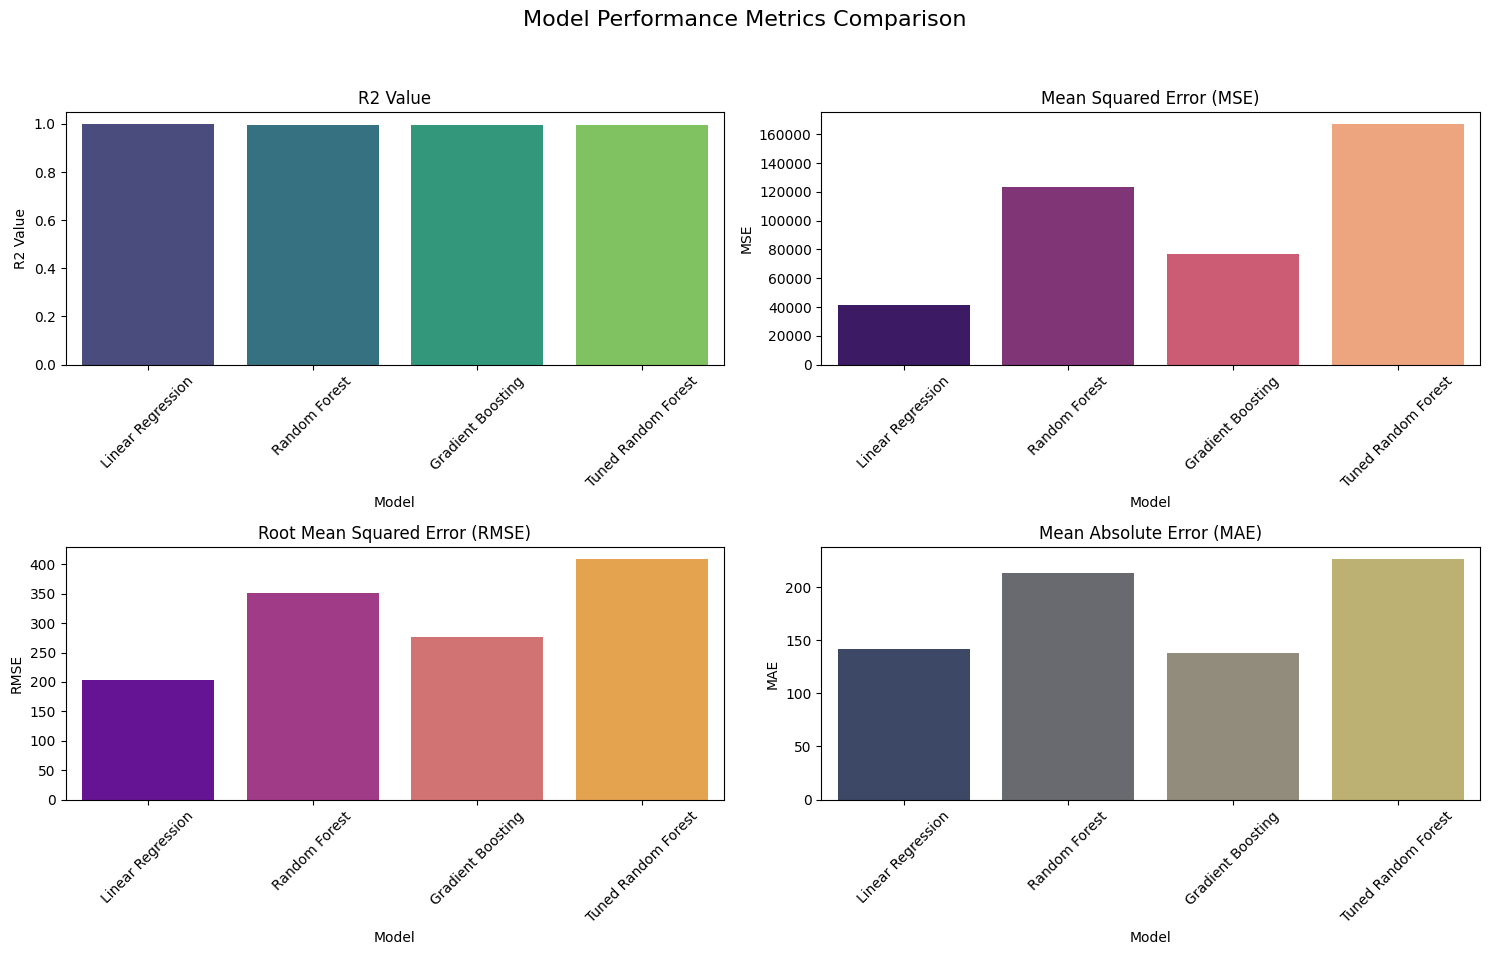

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16)

# Plot R2 Value
sns.barplot(x='Model', y='R2 Value', data=metrics_df, ax=axes[0, 0], palette='viridis', hue='Model', legend=False)
axes[0, 0].set_title('R2 Value')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot MSE
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[0, 1], palette='magma', hue='Model', legend=False)
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[1, 0], palette='plasma', hue='Model', legend=False)
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot MAE
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[1, 1], palette='cividis', hue='Model', legend=False)
axes[1, 1].set_title('Mean Absolute Error (MAE)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Best Model to Showcase
 Linear Regression

Because:

Highest R² score → explains 99.84% variance, best fit.

Lowest RMSE → most accurate on average.

Competitive MAE.

Additional Note

Gradient Boosting has the lowest MAE but slightly higher RMSE and R².
So if you want to highlight a more robust tree-based model, mention Gradient Boosting as runner-up.

